In [36]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import os

% matplotlib inline


games = ["SkiingNoFrameskip-v4"]
seeds = range(5)
game_results = dict(zip(games, [[] for g in games]))
for game in games:
    repeat_results = []
    for seed in seeds:
        results = pandas.read_csv('/home/pc517/ga-dist/distributed/logs/2018:05:11-14:11:15/FrostbiteNoFrameskip-v4/{}/{}/results.csv'.format(game, seed))
        results.insert(0, "seed", pandas.Series(seed, index=results.index))
        repeat_results.append(results)
    game_results[game]=repeat_results


In [37]:
df = pandas.concat(game_results[games[0]]) # only one game for now
df.head()

,seed,worker_id,noise_list,ret,n_steps,n_seconds,finish_time,is_eval,worker_gen,master_gen
0,0,1796935841,160524159,-9000.0,526,3.422759,5.157700,False,0,0
1,0,622375720,41291098,-8976.0,523,3.504375,5.198169,False,0,0
2,0,1474399337,109821501,-8998.0,526,3.669082,5.347895,False,0,0
3,0,247765453,159023085,-8966.0,521,3.685943,5.419495,False,0,0
4,0,1063755529,122071131,-8976.0,523,3.711942,5.440649,False,0,0


In [57]:
graphs = []
for seed in seeds:
    results = pandas.read_csv('distributed/logs/2018:05:06-01:07:50/SkiingNoFrameskip-v4/{}/results.csv'.format(seed))
    valid_results = results[results["worker_gen"]==results["master_gen"]]
    grouped = valid_results.groupby("master_gen")
    #print([(gen_num, len(gen_data)) for gen_num, gen_data in grouped])
    gen_graph = []
    gen_frames = []
    t = 0
    incs_done = 0
    graph = []
    for gen_num, gen_data in grouped:

        n_steps = gen_data["n_steps"].sum()
        n_frames = n_steps*4
        t+=n_frames
        if t >= len(graph) * 10**7:
            incs_done += 1
            muts = gen_data[gen_data["is_eval"]==False]
            mean_mut_ret = muts["ret"].mean()
            graph.append(mean_mut_ret)
            
    graphs.append(graph)

Text(0,0.5,'Median over repeats of mean population score up to time t')

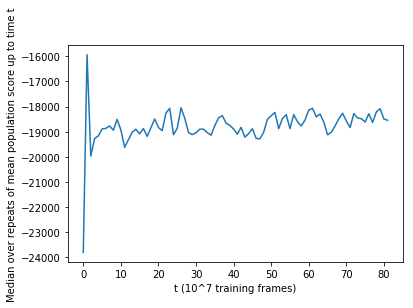

In [59]:
min_len = min([len(graph) for graph in graphs])
plt.plot([np.median([g[x] for g in graphs]) for x in range(min_len)])   
plt.xlabel("t (10^7 training frames)")
plt.ylabel("Median over repeats of mean population score up to time t")
# find bootstrapped confidence intervals

In [41]:
graphs = []
for seed in seeds:
    results = pandas.read_csv('distributed/logs/2018:05:06-01:07:50/SkiingNoFrameskip-v4/{}/results.csv'.format(seed))
    valid_results = results[results["worker_gen"]==results["master_gen"]]
    grouped = valid_results.groupby("master_gen")
    #print([(gen_num, len(gen_data)) for gen_num, gen_data in grouped])
    gen_graph = []
    gen_frames = []
    t = 0
    incs_done = 0
    graph = []
    for gen_num, gen_data in grouped:

        n_steps = gen_data["n_steps"].sum()
        n_frames = n_steps*4
        t+=n_frames
        if t >= len(graph) * 10**7:
            incs_done += 1
            evals = gen_data[gen_data["is_eval"]==True]
            mean_eval_ret = evals["ret"].median()
            graph.append(mean_eval_ret)
            
        
    graphs.append(graph)

[83, 82, 84, 87, 83]


/home/pc517/anaconda3/envs/ga/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Text(0,0.5,'Mean elite score')

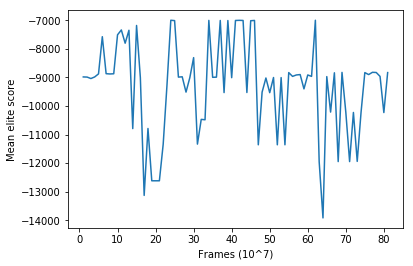

In [52]:
print([len(x) for x in graphs])
# for graph in graphs:
#     plt.plot(range(len(graph)), graph)
min_len = min([len(graph) for graph in graphs])
plt.plot([np.median([g[x] for g in graphs]) for x in range(min_len)])   
plt.xlabel("t (10^7 training frames)")
plt.ylabel("Median over repeats of best mean elite score up to time t")
# find bootstrapped confidence intervals

In [3]:
worker_ids = list(set(results["worker_id"]))
worker_idxs = dict(zip(worker_ids, range(len(worker_ids))))
valid_results = results[results.worker_gen==results.master_gen]
invalid_results = results[results.worker_gen!=results.master_gen]

In [12]:
import seaborn as sns
valid_muts = valid_results[valid_results["is_eval"] == False]
valid_evals = valid_results[valid_results["is_eval"] == True]



In [13]:
valid_evals.head()

,worker_id,noise_list,ret,n_steps,n_seconds,finish_time,is_eval,worker_gen,master_gen
5091,800410109,153708344,-10516.0,679,4.042821,419.174847,True,1,1
5129,1835459255,153708344,-8968.0,522,2.999550,421.780740,True,1,1
5485,2131728304,153708344,-8980.0,523,3.126412,439.135000,True,1,1
5839,2075381938,153708344,-8547.0,534,3.126517,457.390194,True,1,1
5848,422066815,153708344,-8966.0,521,2.980305,457.793983,True,1,1
